# Executive Summary

This project concerns the use of Machine Learning to predict the sale price of houses in Ames, Iowa, given information about the properties.

My overall approach to this problem is:

1. Import Data
2. Exploratory Data Analysis and Preprocessing
3. Application of Machine Learning Algorithms
4. Conclusions and Next Steps

I will look to build upon my previous Kaggle projects, and apply a range of Machine Learning techniques.

# 1. Import Data

First, we import the training data (which we will refer to as analysis data).

In [1]:
import numpy as np
import pandas as pd

analysis_data = pd.read_csv("train.csv")
analysis_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As a first step, the 'data_description.txt' file is inspected. This includes a full description of each feature.

I will not go into descriptions of every single feature here, however I will note some key takeaways:

- There are both numerical and categorical features
- There are both continuous and discrete numerical features)
- It appears that we may have multiple features that represent the same information (and hence some of these featuers are redundant) e.g. GarageCars represents the size of the garage in car capacity, and GarageArea represents the size of the garage in square feet
- Some of the categorical features contain values for the relevant feature that may be misleading e.g. several features contain a category label "NA", which may be incorrectly interpreted as a missing value when in fact it represents a category (e.g. for PoolQC NA represents No Pool)

# 2. Exploratory Data Analysis

## 2.1. Missing Values

First, we check the data for any features which contain missing values - the strategy on how to deal with these missing values will depend on their prevalence.

19


<bound method NDFrame.head of PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64>

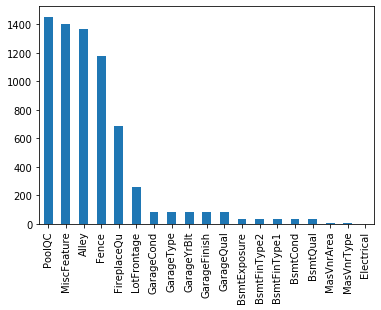

In [2]:
missing_data = analysis_data.isnull().sum()
missing_data.sort_values(inplace=True, ascending=False)
missing_data = missing_data[missing_data > 0]
missing_data.plot.bar()
print(len(missing_data))
missing_data.head

The above plot shows that 19 (of the 81) features appear to have missing data. However, as mentioned previously, for some features the data is not missing but is correctly labelled as "NA". Going back to the text description of the features provided:
- PoolQC: "NA" is used to represent No Pool
- MiscFeature: "NA" means there are No miscellanous features
- Alley: "NA" means there is "No Alley Access"
- Fence:"NA" means there is "No Fence"
- FireplaceQu: "NA" means there is "No Fireplace"
- LotFrontage: This is a numerical value. Thefore, for this feature the missing values 259 missing values above are each missing values. It would be interesting to explore if these missing values had any connection (e.g. all coming from housing data from the same neighbourhood)
- GarageCond: "NA" means there is "No Garage"
- GarageType: "NA" means there is "No Garage"
- GarageYrBlt: "NA" means there is "No Garage"
- GarageFinish: "NA" means there is "No Garage"
- GarageQual: "NA" means there is "No Garage"
- BsmtExposure: "NA" means there is "No Basement"
- BsmtFinType2: "NA" means there is "No Basement"
- BsmtFinType1: "NA" means there is "No Basement"
- BsmtCond: "NA" means there is "No Basement"
- BsmtQual: "NA" means there is "No Basement"
- MasVnrArea: This is a numerical value. Thefore, for this feature the missing values 8 missing values above are each missing values. As for the LotFrontage it would be interesting to explore if these missing values had any connection 
- MasVnrType: One category listed in the description is for "None". It could be that the 8 houses with missing data actually have some representation of "None" which is being interpreted by the isnull() function as NaN
- Electrical: This is a categorical feature of which none of the categories shows in the description file are likely to be interpreted by the isnull() function as NaN. Therefore it is likely that this datapoint is missing
    

In [4]:
#Replace any potential ambiguious variables with "None"
analysis_data['PoolQC'].fillna("None", inplace=True)
analysis_data['MiscFeature'].fillna("None", inplace=True)
analysis_data['Alley'].fillna("None", inplace=True)
analysis_data['Fence'].fillna("None", inplace=True)
analysis_data['FireplaceQu'].fillna("None", inplace=True)
analysis_data['GarageCond'].fillna("None", inplace=True)
analysis_data['GarageType'].fillna("None", inplace=True)
analysis_data['GarageYrBlt'].fillna("None", inplace=True) #As we have added "None" we should make this a categorical variable
analysis_data['GarageFinish'].fillna("None", inplace=True)
analysis_data['GarageQual'].fillna("None", inplace=True)
analysis_data['BsmtExposure'].fillna("None", inplace=True)
analysis_data['BsmtFinType2'].fillna("None", inplace=True)
analysis_data['BsmtFinType1'].fillna("None", inplace=True)
analysis_data['BsmtCond'].fillna("None", inplace=True)
analysis_data['BsmtQual'].fillna("None", inplace=True)

#Replace any missing data with the median/modal value
analysis_data['LotFrontage'].fillna(analysis_data['LotFrontage'].median(), inplace=True)
analysis_data['MasVnrArea'].fillna(analysis_data['MasVnrArea'].median(), inplace=True)
analysis_data['MasVnrType'].fillna(analysis_data['MasVnrType'].mode()[0], inplace=True)
analysis_data['Electrical'].fillna(analysis_data['Electrical'].mode()[0], inplace=True)

## 2.2 Creation of New Features 

From inspection of the features in the data, it is observed that it may be helpful to create some new features.

Therefore, three new features are created:

- InternalSF. This is the sum of the square footage of the basement, first floor, and second floor of each property
- ExternalSF. This is the difference between the lot area and the first floor square footage
- TotalBath. This is the sum of the number of full bathrooms and the number of half bathrooms

In [5]:
#Creation of a feature that summarises the total internal area
analysis_data['InternalSF'] = analysis_data['TotalBsmtSF'] + analysis_data['1stFlrSF'] + analysis_data['2ndFlrSF']

#Creation of a feature that summarises the total external area
analysis_data['ExternalSF'] = analysis_data['LotArea'] - analysis_data['1stFlrSF']

#Creation of a feature that sumamrises the total number of bathrooms (i.e. full baths plus half baths)
analysis_data['TotalBath'] = analysis_data['FullBath'] + analysis_data['HalfBath']

# 2.3 Plotting of Data
### 2.3.1 Plotting of Target Feature

First, plotting simple the number of house sales vs the sale price. It is observed that there is a distrubtion which is skewed towards higher sale price, with several outliers.

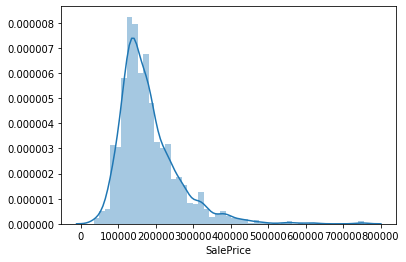

In [7]:
import seaborn as sns
import numpy as np
from scipy import stats

ax = sns.distplot(analysis_data['SalePrice'])

If instead we take the natural log of the sale price, the distribution of sales appears to be approximately normal.

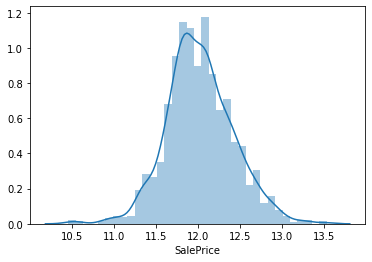

In [8]:
import seaborn as sns
import numpy as np
from scipy import stats

ax = sns.distplot(np.log(analysis_data['SalePrice']))

### 2.3.2 Plotting of Categorical Features

First we need to define which are the categorical features.

In [10]:
categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"]

Then for each feature a boxplot is constructued to allow inspection of the categorical features

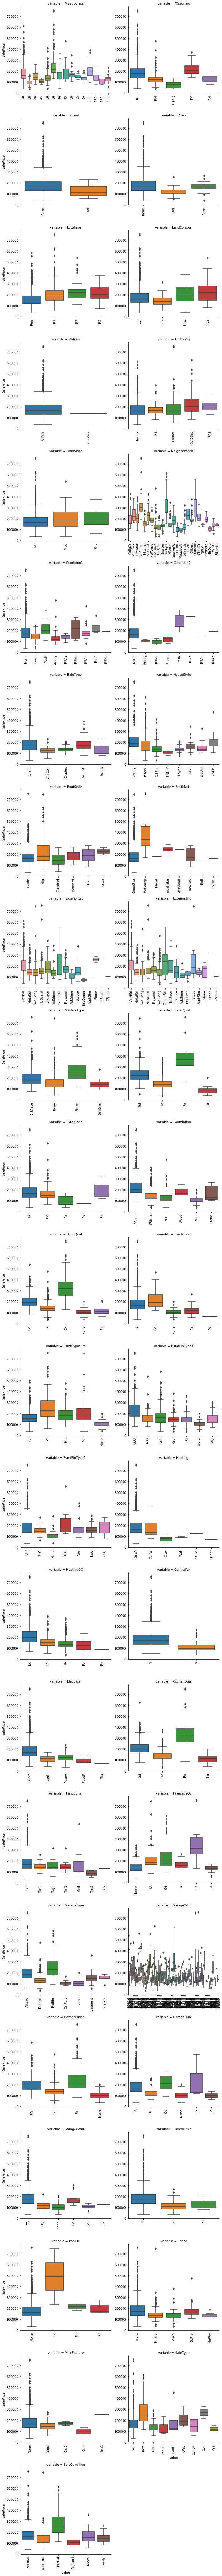

In [11]:
import matplotlib.pyplot as plt

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(analysis_data, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

Some key takeaways from inspection of the plots of categorical data:
- There is clear correlation for house sales in particular reas to have higher SalePrice than other areas (e.g. houses sold in BrDale have lower SalePrice than e.g. StoneBr) 
- The SalePrice for houses with better quality heating systems is higher than for those with only fair or poor heating systems. The same is true for the kitchen quality of the house
- Houses with paved driveways commanded higher sale prices than those with either partial pavement or dirt/gravel driveaways
- Houses with pools were generally more expensive than those without pools
- Generally homes sold as new were more expensive than e.g. those sold as Court Officer Deed/Estate

### 2.3.3 Plotting of Numerical Data

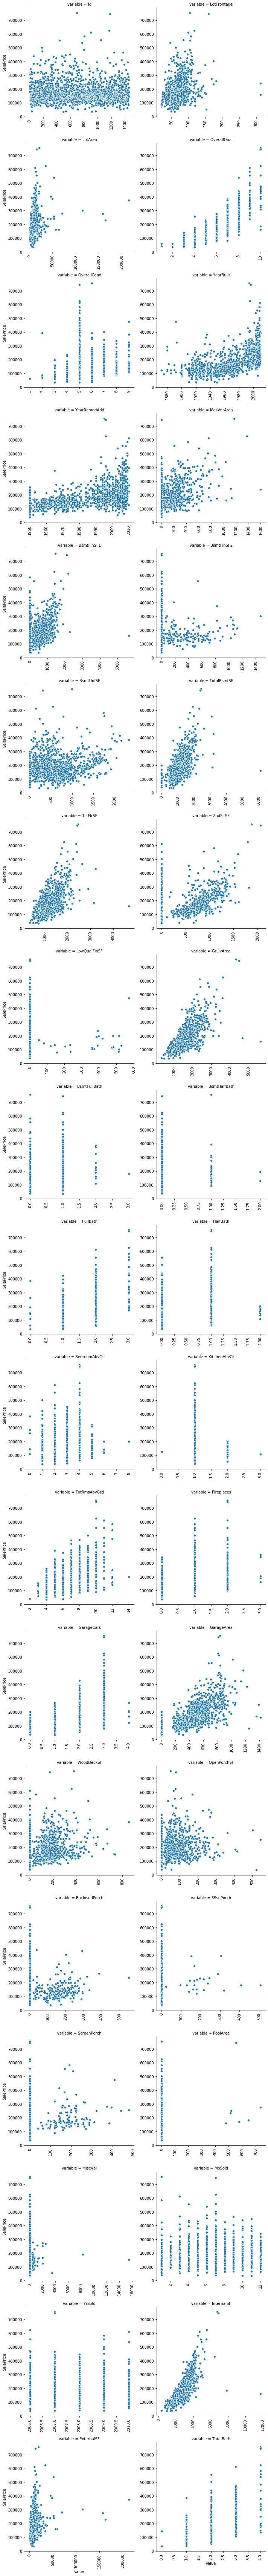

In [15]:
#Extract which are the numerical features, by takibng the categorical features from the original dataframe
numerical_features_with_SalePrice = list(analysis_data.drop(categorical_features, axis=1).columns)
analysis_data_numerical_features_with_SalePrice = analysis_data[numerical_features_with_SalePrice]

numerical_features_without_SalePrice = [ x for x in numerical_features_with_SalePrice if x != 'SalePrice']


import matplotlib.pyplot as plt

def scatterplot(x, y, **kwargs):
    sns.scatterplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(analysis_data, id_vars=['SalePrice'], value_vars=numerical_features_without_SalePrice)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(scatterplot, "value", "SalePrice")

Some of the key takeaways from the plots of the numerical features are:

- There appears to be some outliers in some numerical features e.g. two properties with LotFrontage < 300, when all others have LotFrontage < 200
- Some features (e.g. OverallQual, and GrLivArea) demonstrate a clear positive correlation to SalePrice 
- From the plots, it is relatively difficult to draw much information on the relationship between SalePrice and time as the data does not appear to be seasonal with the months of the year, and the plot shown does not demonstrate a clear correlation between year sold and the sale price

## 2.4 Standardisation & Scaling of Data

### 2.4.1 Encoding Categorical Features

To allow the relevant machine learning algorithms to deal with the categorical data more easily, we preprocess the categorical data using One Hot Encoding.

For each categorical feature, this represents the categorical variables as a sequence of binary featuers (i.e. each feature with multiple potential variables is represented by multiple features filled with either a 0 or 1.

In [16]:
#One Hot Encoding of the categorical features
categorical_features_encoded_analysis_data = pd.get_dummies(analysis_data[categorical_features].astype(str))
categorical_features_encoded_analysis_data.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### 2.4.2 Standardisation of Numerical Data

In order to allow more effective comparison between numerical features and use of the numerical features in Machine Learning Algorithms, the numerical data is standardised.

This is done using the StandardScaler from sklearn, which gives each feature a mean of 0 and a variance of 1.

In [17]:
#Extract which are the numerical features, by takibng the categorical features from the original dataframe
numerical_features_analysis_data = analysis_data.drop(categorical_features, axis=1)
#selected_numerical_features_without_SalePrice = numerical_features_with_SalePrice.drop(['Id','InternalSF', 'GarageArea', 'GrLivArea', 'ExternalSF','1stFlrSF', 'SalePrice'], axis=1).columns
#selected_numerical_analysis_data = analysis_data_d[analysis_data_d.columns.intersection(selected_numerical_features_without_SalePrice)]

#Import the StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#Produce an array of the standardised numerical data
scaled_numerical_features_analysis_data_array = ss.fit_transform(numerical_features_analysis_data)

#Convert the arary of the standardised numerical data to a dataframe
scaled_numerical_features_analysis_data = pd.DataFrame(scaled_numerical_features_analysis_data_array, numerical_features_analysis_data.index, numerical_features_analysis_data.columns)

#Produce version without SalePrice
scaled_numerical_features_analysis_data_without_SalePrice = scaled_numerical_features_analysis_data.drop(['SalePrice'], axis=1)

scaled_numerical_features_analysis_data.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,InternalSF,ExternalSF,TotalBath
0,-1.730865,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273,-0.001277,-0.178357,1.323851
1,-1.728492,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288,-0.052407,-0.102969,0.065503
2,-1.726120,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154,0.169157,0.098875,1.323851
3,-1.723747,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281,-0.114493,-0.077536,-1.192845
4,-1.721374,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843,0.944631,0.381072,1.323851


## 2.5 Feature Selection

A key consideration for this dataset is that there are a large number of features. The description of the features provided implies that several of these features may be highly correlated (e.g. GarageArea (the size of garage in square feet) and GarageCars (the size of the garage in car capacity).

Therefore, it will be worthwhile only including some of the features, which may be used to represent the data for all features. This will allow more effective use of the MLAs, whilst also not sacrifing on the detail of the information provided.

### 2.5.1 Categorical Feature Selection

The SelectKBest feature selector from sklearn is used, with K set at 10. This was chosen as a balance between excluding enough features such that the data still provides the algorithm with sufficient information, and not excluding all of the relevant information.

As the features are categorical, and the output is numerical (i.e. SalePrice), SelectKBest was evaluated on ANOVA f_classif(). 

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Instantiate the feature selector
categorical_feature_selector = SelectKBest(f_classif, k=10)
categorical_feature_selector.fit(categorical_features_encoded_analysis_data, analysis_data['SalePrice'])
#Output the array of the selected categorical features and their values
selected_categorical_features_encoded_analysis_data = categorical_feature_selector.transform(categorical_features_encoded_analysis_data)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


The categorical features selected may be listed below, and refer to the condition of the property, its exterior, heating, garage, and the type of sale.

In [19]:
#To get the features which have been selected
mask = categorical_feature_selector.get_support() #list of booleans
names_of_selected_categorical_features_encoded_analysis_data = [] # The list of your K best features

for bool, feature in zip(mask, categorical_features_encoded_analysis_data.columns):
    if bool:
        names_of_selected_categorical_features_encoded_analysis_data.append(feature)

names_of_selected_categorical_features_encoded_analysis_data

['Condition2_RRAn',
 'Exterior1st_ImStucc',
 'Exterior2nd_Other',
 'ExterCond_Po',
 'Heating_Floor',
 'GarageYrBlt_1938.0',
 'GarageYrBlt_2009.0',
 'GarageYrBlt_2010.0',
 'SaleType_Con',
 'SaleCondition_Alloca']

### 2.5.2 Numerical Feature Selection

For reference, we put together a simple plot showing the Pearson correalation, between all of the features (including those which have been engineered by me).

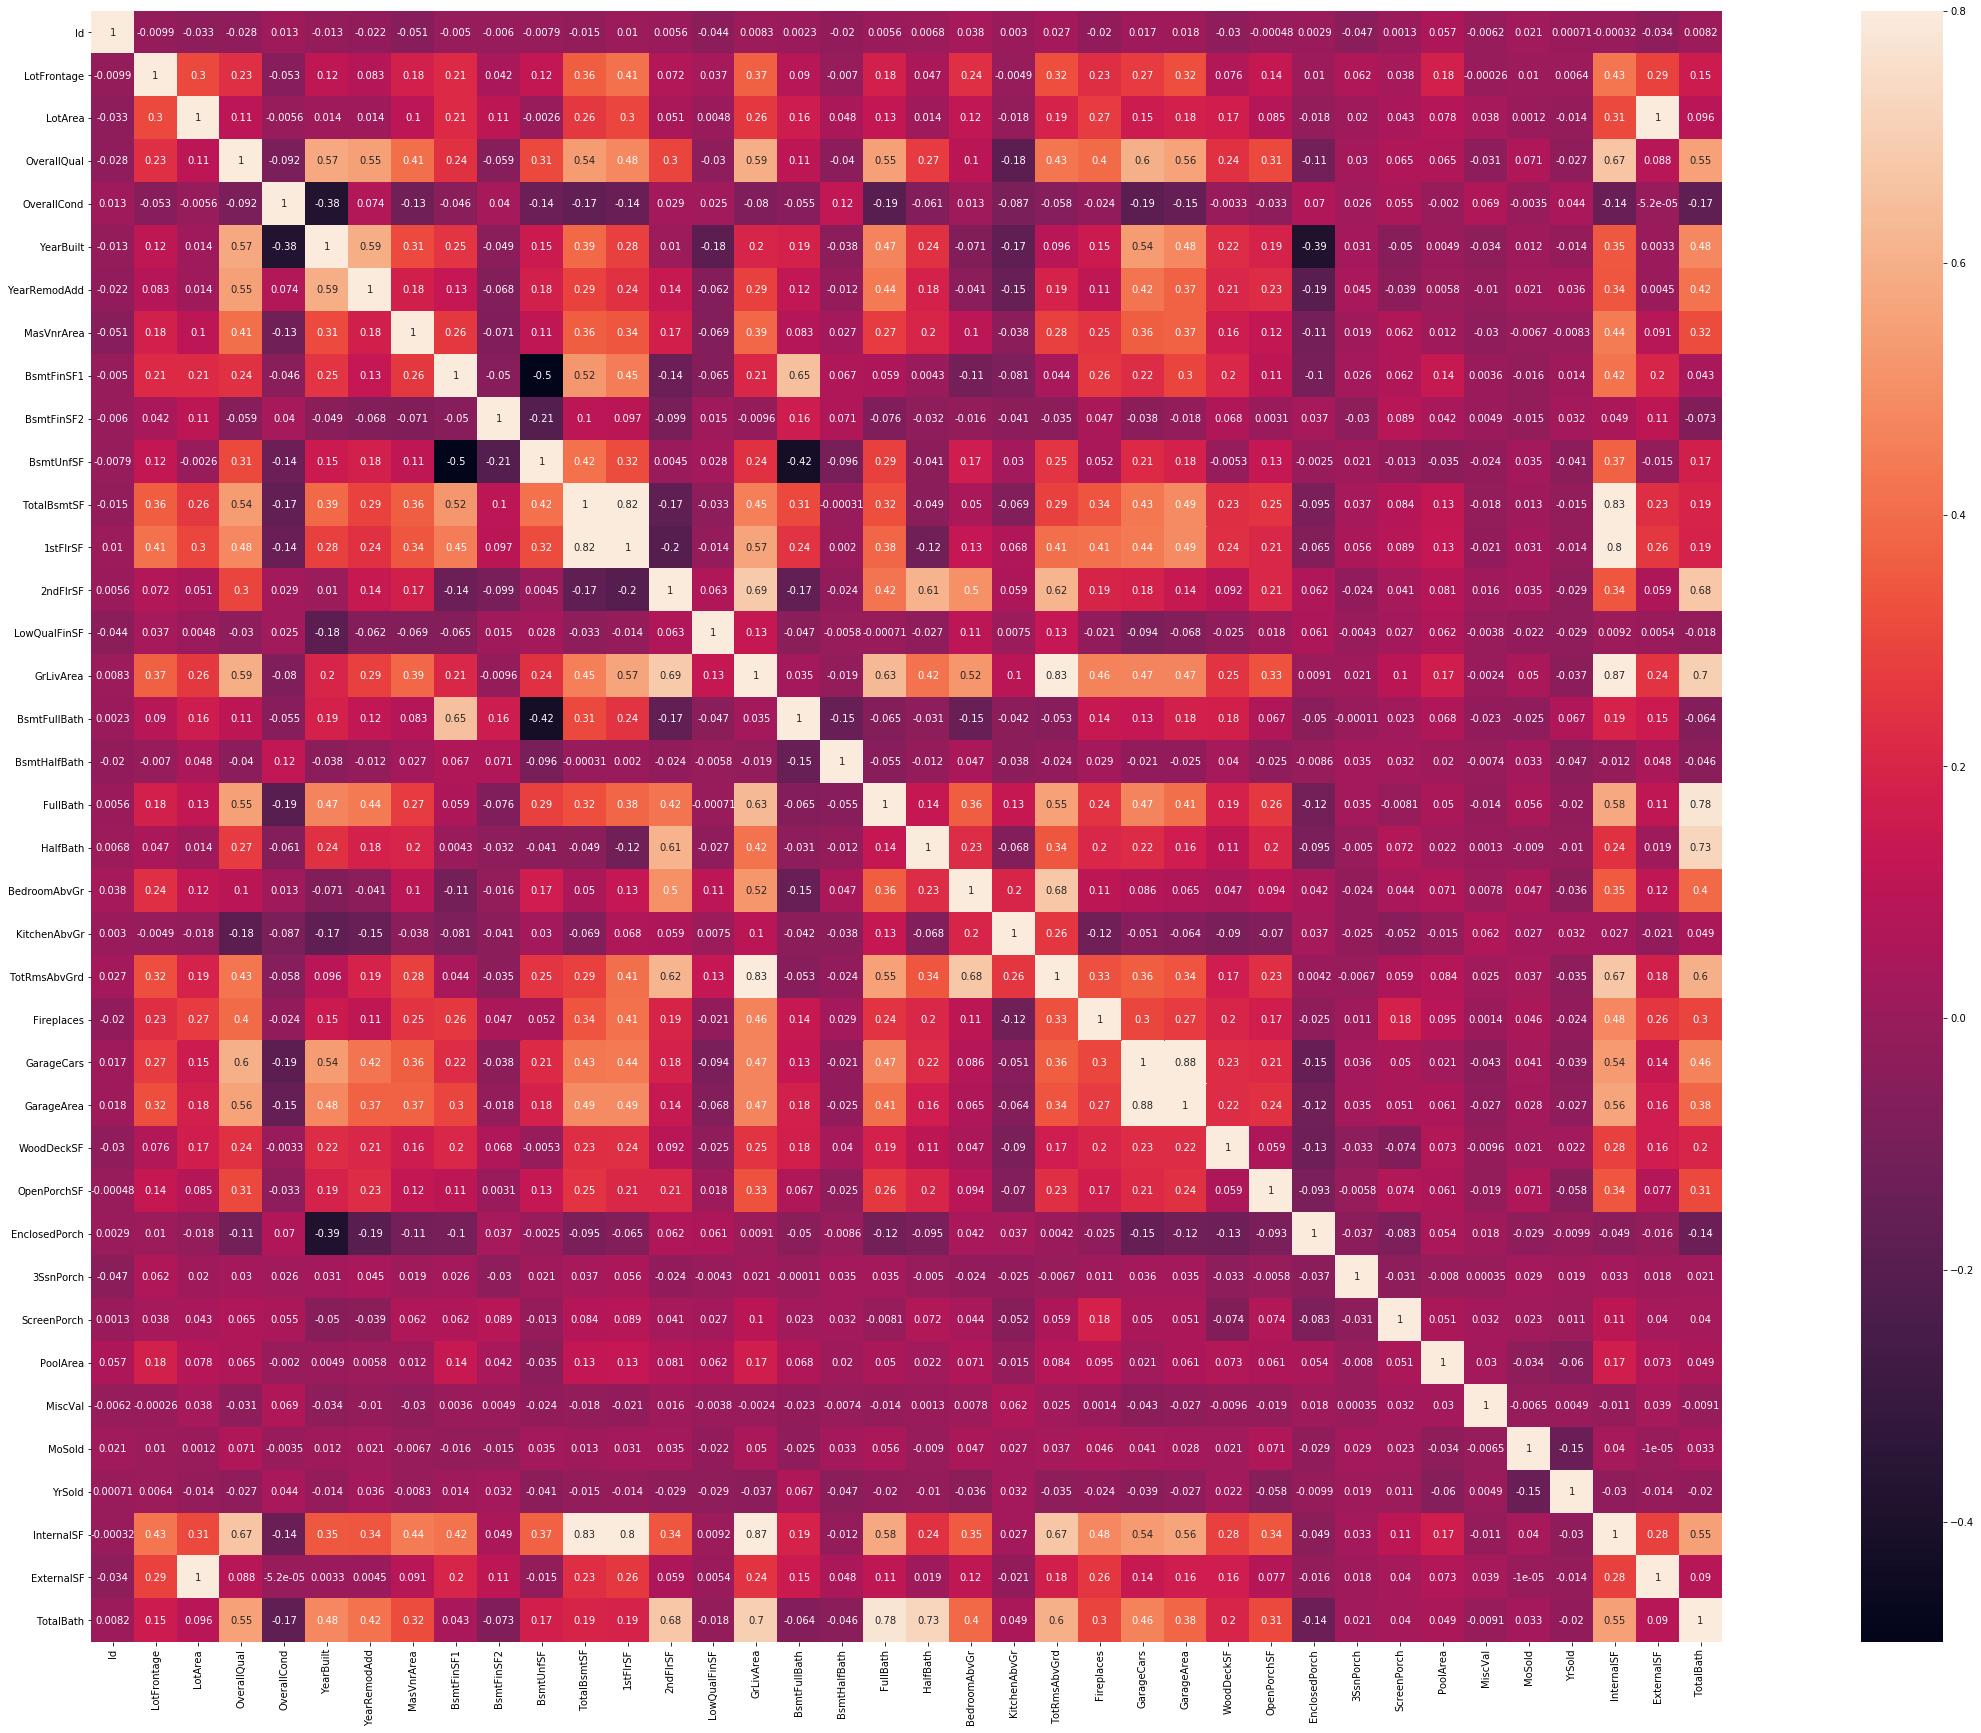

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_analysis_data = scaled_numerical_features_analysis_data_without_SalePrice.corr()
fig, ax=plt.subplots(figsize=(50,30))
sns.heatmap(corr_analysis_data, vmax=0.8, square=True,  annot=True)

The above plot shows some features are strongly correlated. 

As for categorical features, we use SelectKBest to find ten numerical features to include. The evaluation for numerical features is done using Pearson's correlation (i.e. the argument is set to f_regression).

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Instantiate the feature selector
numerical_feature_selector = SelectKBest(f_regression, k=10)
numerical_feature_selector.fit(scaled_numerical_features_analysis_data_without_SalePrice, scaled_numerical_features_analysis_data['SalePrice'])

#Output the array of the selected numerical features and their values
selected_scaled_numerical_features_analysis_data = numerical_feature_selector.transform(scaled_numerical_features_analysis_data_without_SalePrice)

The selected numerical features may be listed, and consider the quality of the property, various mesasures of its square footage, the size of the garage, and the total number of rooms and bathrooms.

In [22]:
#To get the features which have been selected
mask = numerical_feature_selector.get_support() #list of booleans
names_of_selected_scaled_numerical_features_analysis_data = [] # The list of your K best features

for bool, feature in zip(mask, scaled_numerical_features_analysis_data_without_SalePrice.columns):
    if bool:
        names_of_selected_scaled_numerical_features_analysis_data.append(feature)
names_of_selected_scaled_numerical_features_analysis_data

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'InternalSF',
 'TotalBath']

## 2.6 Final PreProcessing Steps

At this point we have the features we have selected in two parts:
- an array of selected standardised numerical data
- an array of selected encoded categorical data

This two datasets must be put back together before the MLAs can be used on them.

In [23]:
processed_analysis_data = np.concatenate([selected_categorical_features_encoded_analysis_data, selected_scaled_numerical_features_analysis_data], axis=1)

The data is then split into data for training the MLA and data for testing the MLA, and the dependent and independent features are defined.

In [24]:
#Defining independent and target variables
processed_analysis_data_X = processed_analysis_data
processed_analysis_data_y = analysis_data['SalePrice']

#Splitting the data into train and test
from sklearn.model_selection import train_test_split
processed_analysis_data_X_train, processed_analysis_data_X_test, processed_analysis_data_y_train, processed_analysis_data_y_test = train_test_split(processed_analysis_data_X, processed_analysis_data_y, test_size = 0.3, random_state=42)

# 3. Application of Machine Learning Algorithms



### 3.1.1 Linear Regression
The first algorithm used is Linear Regression.

As the test statistic used in the competition is Root Mean Square Error, for each algorithm this quantity will be calculated. Then the algorithms may be compared, and the optimal one used for application to the submission data.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

#Instatntiate the Linear Regressor
reg_lr = LinearRegression()

#Fit the regressor to the training set
reg_lr.fit(processed_analysis_data_X_train, processed_analysis_data_y_train)

#Predict the labels of the 
pred_lr = reg_lr.predict(processed_analysis_data_X_test)

#Convert both the predictions and the actual values to an array to be used in Python mean-squared error functiopn from scikitlearn
a1_lr = np.asarray(pred_lr)
a2_lr = np.asarray(processed_analysis_data_y_test)

#Need to change them to logs (as this is what the RMSE function is evaluated on for this competition)
log_a1_lr = np.log(a1_lr)
log_a2_lr = np.log(a2_lr)

#Evaluate the Root Mean Square Error of the predictions against the actual values
rmse_lr = sqrt(mean_squared_error(log_a2_lr, log_a1_lr))

print(rmse_lr)

0.29004338603948354


### 3.1.2 kNN

We then move onto using kNearestNeighbors, for a value of k of between 1 and 20.

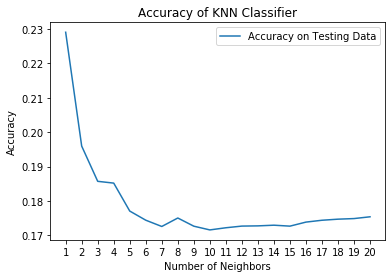

0.1715772421723385


In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

#Set up the values of neighbors we will use
neighbors = np.arange(1,21)
rmse = np.empty(len(neighbors))

for b, k in enumerate(neighbors):
    
    #KNN Regressor with k neighbors is set up
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Fit the classifier to the training data
    knn.fit(processed_analysis_data_X_train, processed_analysis_data_y_train)
    
    #Use the classifier on the testing data
    predictions = knn.predict(processed_analysis_data_X_test)
    
    #Convert my predictions to a DataFrame
    evaluation_of_predictions = pd.DataFrame(predictions,columns=['Predictions'])
    
    #Convert both the predictions and the actual values to an array to be used in Python mean-squared error functiopn from scikitlearn
    a1 = np.asarray(evaluation_of_predictions)
    a2 = np.asarray(processed_analysis_data_y_test)
    
    #Need to change them to logs (as this is what the RMSE function is evaluated on for this competition)
    log_a1 = np.log(a1)
    log_a2 = np.log(a2)
    
    #Evaluate the Root Mean Square Error of the predictions against the actual values
    rmse[b] = sqrt(mean_squared_error(log_a2, log_a1))

from matplotlib import pyplot as plt
plt.title('Accuracy of KNN Classifier')
plt.plot(neighbors, rmse, label = 'Accuracy on Testing Data')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()

print(min(rmse))

It can be observed that the minimum value for the RMSE using the kNN is c. 0.17 (achieved for k of c. 10)

### 3.1.3 XGBoost

The final algorithm used is XGBoost - this is an implementation of gradiest boosted decision trees developed by Tianqi Chen.

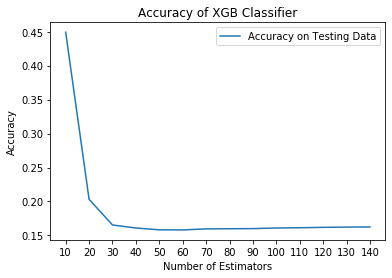

0.15809633223984357


In [27]:
import xgboost as xgb

estimators = np.arange(10,150,10)
rmse_xg = np.empty(len(estimators))

for b, e in enumerate(estimators):
    
    #XGB regressor with e estimators
    xg_reg = xgb.XGBRegressor(seed=123, objective="reg:squarederror", n_estimators=e)
    
    #Fit the classifier to the training data
    xg_reg.fit(processed_analysis_data_X_train, processed_analysis_data_y_train)
    
    #Use the classifier on the testing data
    predictions_xg = xg_reg.predict(processed_analysis_data_X_test)
    
    #Convert my predictions to a DataFrame
    evaluation_of_predictions_xg = pd.DataFrame(predictions_xg,columns=['Predictions'])
    
    #Convert both the predictions and the actual values to an array to be used in Python mean-squared error functiopn from scikitlearn
    a1_xg = np.asarray(evaluation_of_predictions_xg)
    a2_xg = np.asarray(processed_analysis_data_y_test)
    
    #Need to change them to logs (as this is what the RMSE function is evaluated on for this competition)
    log_a1_xg = np.log(a1_xg)
    log_a2_xg = np.log(a2_xg)
    
    #Evaluate the Root Mean Square Error of the predictions against the actual values
    rmse_xg[b] = sqrt(mean_squared_error(log_a2_xg, log_a1_xg))

from matplotlib import pyplot as plt
plt.title('Accuracy of XGB Classifier')
plt.plot(estimators, rmse_xg, label = 'Accuracy on Testing Data')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(estimators)
plt.show()

print(min(rmse_xg))

It can be observed that the minimum value for the RMSE using XGBoost is c. 0.16 (achieved for c. 50 estimators).

As XGBoost provided the lowest RMSE of the three MLA tested, XGBoost with 50 estimators will be used to evaluate the submission data.

## 3.2 Application to Submission Data

### 3.2.1 Transformation & Preprocessing of Submission Data

In order for the chosen MLA to be applied to the submission data, the data must undergo the same transformations as were applied to the analysis data.

The data is first inspected for any missing values.

In [28]:
submission_data = pd.read_csv("test.csv")
submission_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


33


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

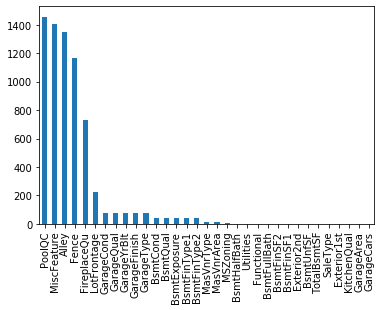

In [29]:
#Checking for missing data
submission_missing_data = submission_data.isnull().sum()
submission_missing_data.sort_values(inplace=True, ascending=False)
submission_missing_data = submission_missing_data[submission_missing_data > 0]
submission_missing_data.plot.bar()
print(len(submission_missing_data))
submission_missing_data

There are a few features that in the analysis data had no missing values, but in the submission data do have >0 missing data points for that feature:
- MSZoning - this description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- BsmtHalfBath - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- Utilities - This description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- Functional - this description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- BsmtFullBath - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- BsmtFinSF2 - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- BsmtFinSF1 - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- Exterior2nd - This appears to be None if there is not a second floor
- BsmtUnfSF - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- TotalBsmtSF - It may be assumed this is 0 square feet because there is no basement. Therefore set to 0
- SaleType - This description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- Exterior1st - This description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- KitchenQual - This description has no variables that may be misinterpredted as NA. Therefore replace with the modal value
- GarageArea - It may be assumed this is 0 square feet because there is no garage. Therefore set to 0
- GarageCars - It may be assumed this is 0 square feet because there is no garage. Therefore set to 0

In [31]:
#Dealing with missing data
#Replace any potential ambiguious variables with "None"
submission_data['PoolQC'].fillna("None", inplace=True)
submission_data['MiscFeature'].fillna("None", inplace=True)
submission_data['Alley'].fillna("None", inplace=True)
submission_data['Fence'].fillna("None", inplace=True)
submission_data['FireplaceQu'].fillna("None", inplace=True)
submission_data['GarageCond'].fillna("None", inplace=True)
submission_data['GarageType'].fillna("None", inplace=True)
submission_data['GarageYrBlt'].fillna("None", inplace=True)
submission_data['GarageFinish'].fillna("None", inplace=True)
submission_data['GarageQual'].fillna("None", inplace=True)
submission_data['BsmtExposure'].fillna("None", inplace=True)
submission_data['BsmtFinType2'].fillna("None", inplace=True)
submission_data['BsmtFinType1'].fillna("None", inplace=True)
submission_data['BsmtCond'].fillna("None", inplace=True)
submission_data['BsmtQual'].fillna("None", inplace=True)

submission_data['Exterior2nd'].fillna("None", inplace=True)

#Replace any missing data with the median/modal value
submission_data['LotFrontage'].fillna(submission_data['LotFrontage'].median(), inplace=True)
submission_data['MasVnrArea'].fillna(submission_data['MasVnrArea'].median(), inplace=True)
submission_data['MasVnrType'].fillna(submission_data['MasVnrType'].mode()[0], inplace=True)
submission_data['Electrical'].fillna(submission_data['Electrical'].mode()[0], inplace=True)

submission_data['MSZoning'].fillna(submission_data['MSZoning'].mode()[0], inplace=True)
submission_data['Utilities'].fillna(submission_data['Utilities'].mode()[0], inplace=True)
submission_data['Functional'].fillna(submission_data['Functional'].mode()[0], inplace=True)
submission_data['SaleType'].fillna(submission_data['SaleType'].mode()[0], inplace=True)
submission_data['Exterior1st'].fillna(submission_data['Exterior1st'].mode()[0], inplace=True)
submission_data['KitchenQual'].fillna(submission_data['KitchenQual'].mode()[0], inplace=True)

#Replace any missing data with the value 0 as it is implied the feature may not exist
submission_data['BsmtHalfBath'].fillna(0, inplace=True)
submission_data['BsmtFullBath'].fillna(0, inplace=True)
submission_data['BsmtFinSF1'].fillna(0, inplace=True)
submission_data['BsmtFinSF2'].fillna(0, inplace=True)
submission_data['BsmtUnfSF'].fillna(0, inplace=True)
submission_data['TotalBsmtSF'].fillna(0, inplace=True)
submission_data['GarageArea'].fillna(0, inplace=True)
submission_data['GarageCars'].fillna(0, inplace=True)

#Creation of new features
#Creation of a feature that summarises the total internal area
submission_data['InternalSF'] = submission_data['TotalBsmtSF'] + submission_data['1stFlrSF'] + submission_data['2ndFlrSF']

#Creation of a feature that summarises the total external area
submission_data['ExternalSF'] = submission_data['LotArea'] - submission_data['1stFlrSF']

#Creation of a feature that sumamrises the total number of bathrooms (i.e. full baths plus half baths)
submission_data['TotalBath'] = submission_data['FullBath'] + submission_data['HalfBath']

#One Hot Encoding of categorical variables
categorical_features_encoded_submission_data = pd.get_dummies(submission_data[categorical_features])

#Extract which are the numerical features, by takibng the categorical features from the original dataframe
numerical_features_submission_data = submission_data.drop(categorical_features, axis=1)

#Import the StandardScaler
from sklearn.preprocessing import StandardScaler
ss_submission = StandardScaler()

#Produce an array of the standardised numerical data
scaled_numerical_features_submission_data_array = ss.fit_transform(numerical_features_submission_data)

#Convert the arary of the standardised numerical data to a dataframe
scaled_numerical_features_submission_data = pd.DataFrame(scaled_numerical_features_submission_data_array, numerical_features_submission_data.index, numerical_features_submission_data.columns)


#Select the same categorical features as were selected for the analysis data
selected_categorical_features_encoded_submission_data = categorical_features_encoded_submission_data[categorical_features_encoded_submission_data.columns.intersection(names_of_selected_categorical_features_encoded_analysis_data)]

#Find the list of columns which appear in the selected categorical features for analysis data but not in the encoded selected submission categorical features
categorical_features_to_add_to_submission_data = list(set(names_of_selected_categorical_features_encoded_analysis_data)-set(list(selected_categorical_features_encoded_submission_data.columns)))

#Add these missing features in, with values all set to 0
for feature in categorical_features_to_add_to_submission_data:
    selected_categorical_features_encoded_submission_data[feature] = 0

#Reoder the features to be as they were in the analysis data
selected_categorical_features_encoded_submission_data = selected_categorical_features_encoded_submission_data[names_of_selected_categorical_features_encoded_analysis_data]

#Make an array of the values as we did for the analysis data
selected_categorical_features_encoded_submission_data = selected_categorical_features_encoded_submission_data.values



#Select the same numerical features as were selected for the analysis data
selected_scaled_numerical_features_submission_data = scaled_numerical_features_submission_data[scaled_numerical_features_submission_data.columns.intersection(names_of_selected_scaled_numerical_features_analysis_data)]

#Make an array of the values as we did for the analysis data
selected_scaled_numerical_features_submission_data = selected_scaled_numerical_features_submission_data.values



#Concantenate the categorical data and the numerical data
processed_submission_data = np.concatenate([selected_categorical_features_encoded_submission_data, selected_scaled_numerical_features_submission_data], axis=1)


#Defining independent variables
processed_submission_data_X = processed_submission_data

/Users/danielscott/.local/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.2 Application of Machine Learning Algorithms to Processed Submission Data 

As previously discussed, the XGBoost algorithm with 50 estimators will be applied to the submission data.

This algorithm is used to create an array of the predicted values, which is then transformed to a data frame and subsequently a csv file for submission.

In [32]:
# Import xgboost
import xgboost as xgb

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(seed=123, objective="reg:linear", n_estimators=50)

# Fit the regressor to the training set
xg_reg.fit(processed_analysis_data_X, processed_analysis_data_y)

# Predict the labels of the test set: preds
preds_xg = xg_reg.predict(processed_submission_data_X)

#Transformation of the predictions into a dataframe
submission_predictions_xg = pd.DataFrame(preds_xg,columns=['SalePrice'])
submission_predictions_xg['Id'] = submission_data['Id']
cols_xg = ['Id', 'SalePrice']
submission_predictions_xg = submission_predictions_xg[cols_xg]

#Conversion of the predictions dataframe into a CSV file for submission
submission_predictions_xg.to_csv('predictions_xg.csv', index=False)

[09:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


The CSV file containing my predictions was then uploaded to the Kaggle website, which informed me I had scored an RMSE of c. 0.171, placing me 3180th on the leaderboard (out of 4563 entrants at that time, i.e. around two thirds of entrants had a better score than me).

# 4. Conclusions and Next Steps

As there are entries with a much better score than mine, I would look to improve my analysis, as well as learn for future Machine Learning projects. Some potential things to work on are:

- Use of ensemble methods - many of the top scoring entries note that they utilised ensemble methods in their analysis
- More rigorous feature selection, including the use of Principal Component Analysis
- Greater stringency in the use of e.g. standardisation / normalisation, with more rigorous analysis of whether the numerical data has been standardised in the correct fashion

I look forward to exploring these in my next project!